In [1]:
import csv
import pandas as pd
import os
from running_algo import *
from sub_super_script import *
from html_utils import *
from formatting import *
from init_html import *
from plot_diurnal import *
from numbers_to_strings import *
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

In [12]:

#creating a new directory called HTMLS, After_cleaning, before_cleaning
main_directory = r"E:\MTech_Project\CPCB_Datavalidation\aq_preprocessor\airpy"
Path(main_directory + "\HTMLS").mkdir(parents=True, exist_ok=True)
Path(main_directory + "\After_Cleaning").mkdir(parents=True, exist_ok=True)

### For a folder

NO Ozone data
Airoli, Navi Mumbai - MPCB
Airoli, Navi Mumbai - MPCB
successfully cleaned  NOx   Airoli, Navi Mumbai - MPCB
No available  NO2  data
No available  NO  data
Error in Unit identification
saved successfully for Airoli, Navi Mumbai - MPCB
NO Ozone data
Bandra Kurla Complex, Mumbai - IITM
Bandra Kurla Complex, Mumbai - IITM
successfully cleaned  NOx   Bandra Kurla Complex, Mumbai - IITM
successfully cleaned  NO2   Bandra Kurla Complex, Mumbai - IITM
successfully cleaned  NO   Bandra Kurla Complex, Mumbai - IITM


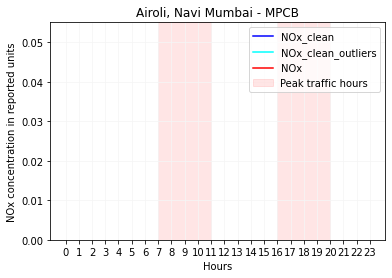

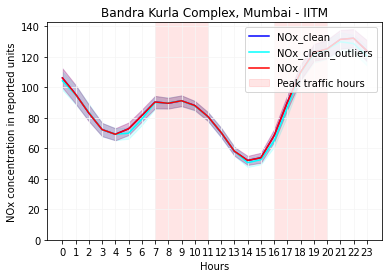

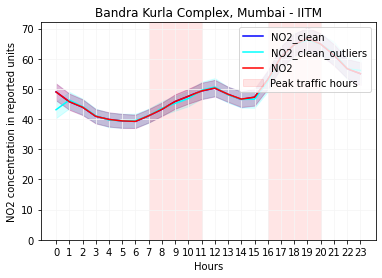

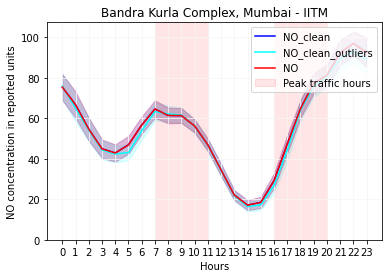

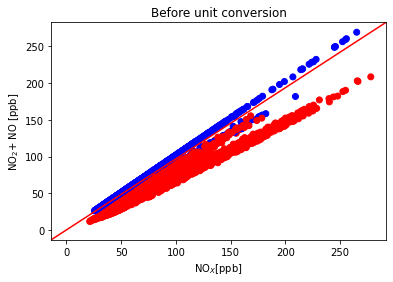

Pick an option, pick M for mixed:
1) C1
2) C2
3) M
4) 0
Your choice: M
You picked: M


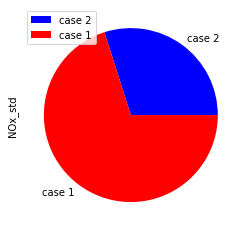

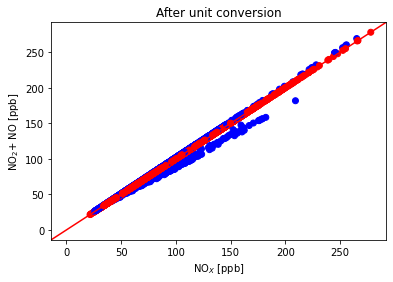

saved successfully for Bandra Kurla Complex, Mumbai - IITM
NO Ozone data
Bandra, Mumbai - MPCB
Bandra, Mumbai - MPCB
successfully cleaned  NOx   Bandra, Mumbai - MPCB
successfully cleaned  NO2   Bandra, Mumbai - MPCB
successfully cleaned  NO   Bandra, Mumbai - MPCB


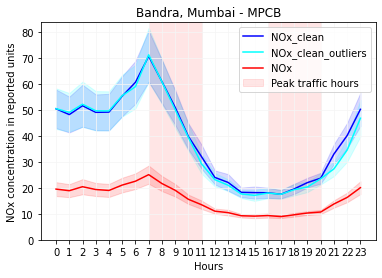

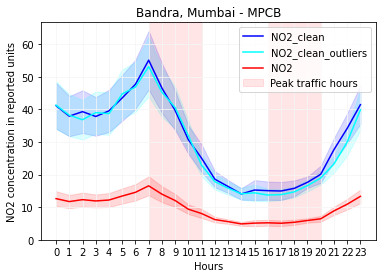

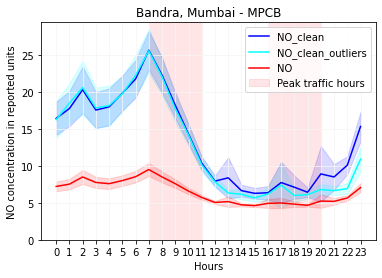

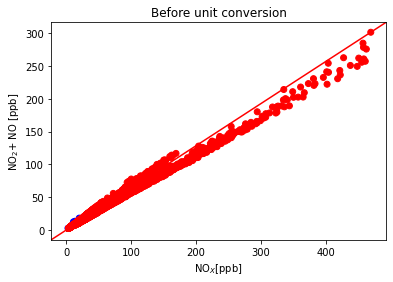

Pick an option, pick M for mixed:
1) C1
2) C2
3) M
4) 0
Your choice: M
You picked: M


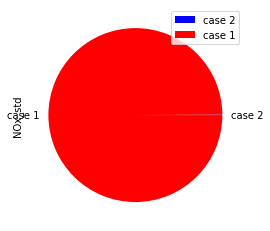

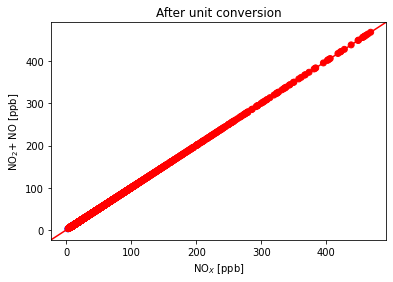

saved successfully for Bandra, Mumbai - MPCB
NO Ozone data
Borivali East, Mumbai - IITM
Borivali East, Mumbai - IITM
successfully cleaned  NOx   Borivali East, Mumbai - IITM
successfully cleaned  NO2   Borivali East, Mumbai - IITM
successfully cleaned  NO   Borivali East, Mumbai - IITM


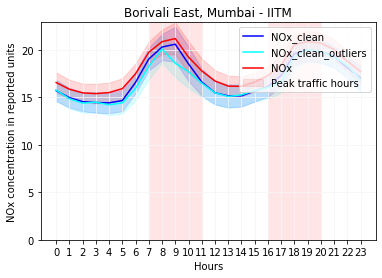

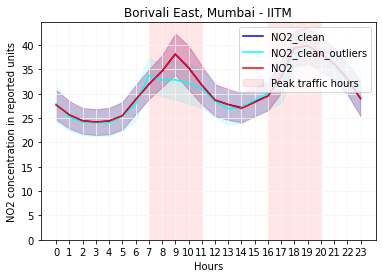

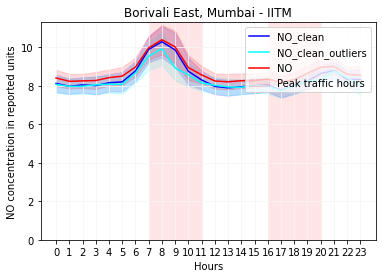

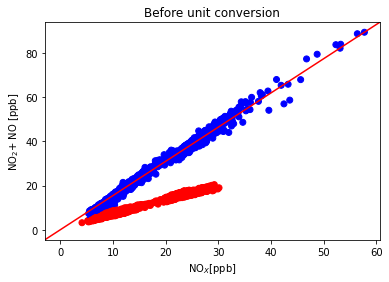

Pick an option, pick M for mixed:
1) C1
2) C2
3) M
4) 0
Your choice: M
You picked: M


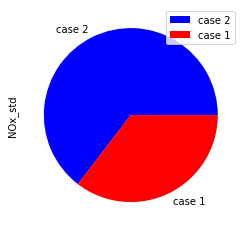

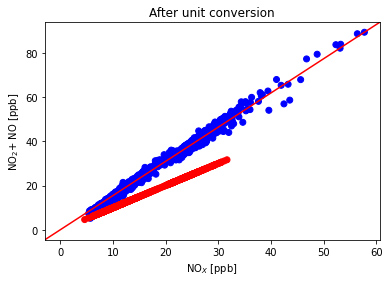

saved successfully for Borivali East, Mumbai - IITM
NO Ozone data
Borivali East, Mumbai - MPCB
Borivali East, Mumbai - MPCB
successfully cleaned  NOx   Borivali East, Mumbai - MPCB
successfully cleaned  NO2   Borivali East, Mumbai - MPCB
successfully cleaned  NO   Borivali East, Mumbai - MPCB


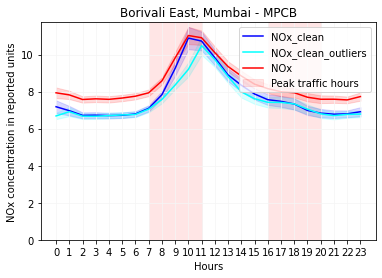

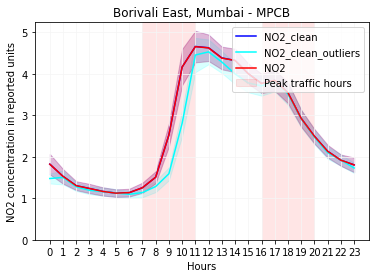

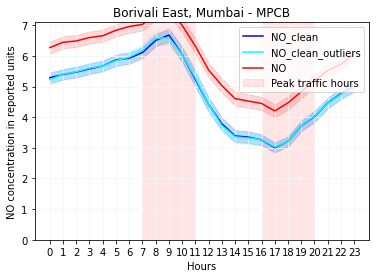

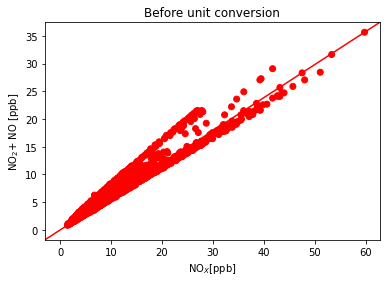

Pick an option, pick M for mixed:
1) C1
2) C2
3) M
4) 0
Your choice: M
You picked: M


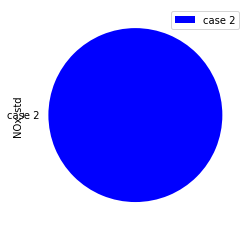

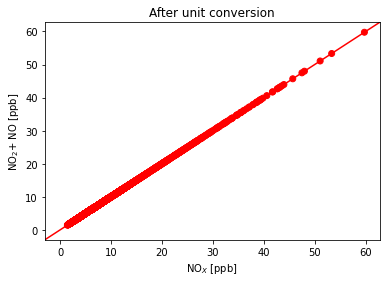

saved successfully for Borivali East, Mumbai - MPCB
NO Ozone data
Chakala-Andheri East, Mumbai - IITM
Chakala-Andheri East, Mumbai - IITM
successfully cleaned  NOx   Chakala-Andheri East, Mumbai - IITM
successfully cleaned  NO2   Chakala-Andheri East, Mumbai - IITM
successfully cleaned  NO   Chakala-Andheri East, Mumbai - IITM


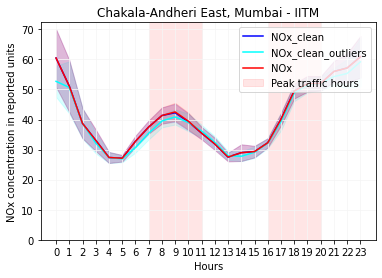

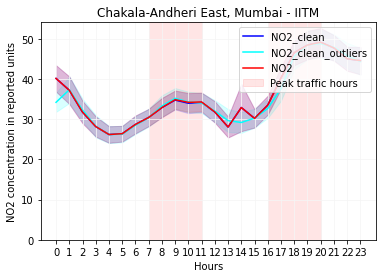

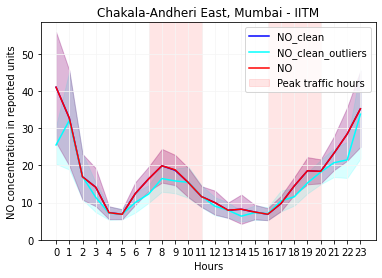

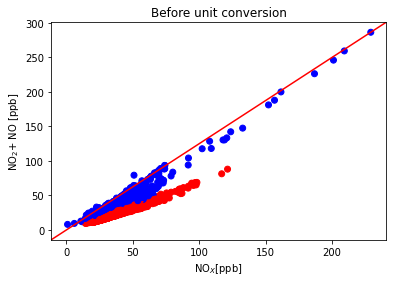

Pick an option, pick M for mixed:
1) C1
2) C2
3) M
4) 0
Your choice: M
You picked: M


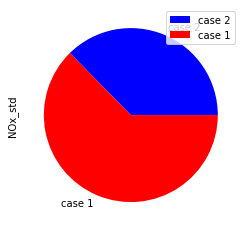

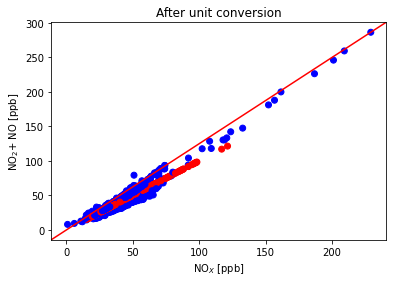

saved successfully for Chakala-Andheri East, Mumbai - IITM
NO Ozone data
Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB
Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB
successfully cleaned  NOx   Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB
successfully cleaned  NO2   Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB
successfully cleaned  NO   Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB


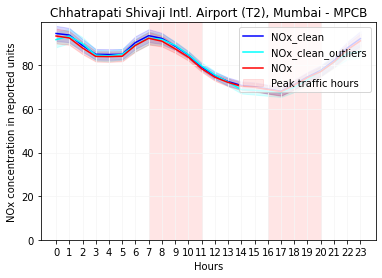

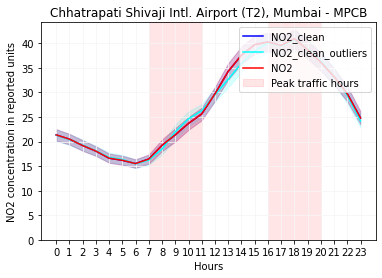

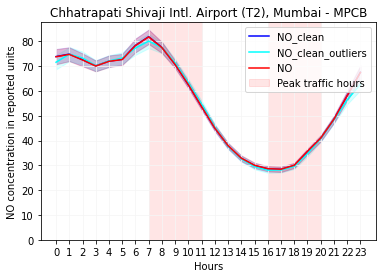

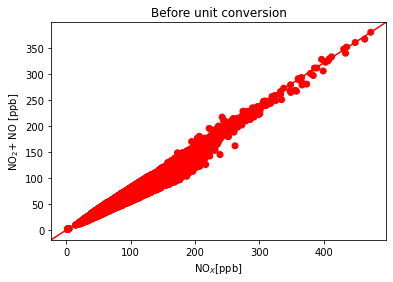

Pick an option, pick M for mixed:
1) C1
2) C2
3) M
4) 0
Your choice: M
You picked: M


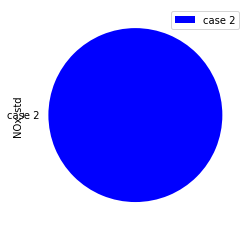

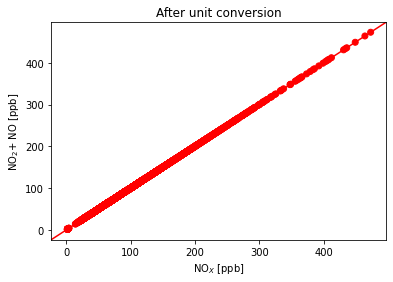

saved successfully for Chhatrapati Shivaji Intl. Airport (T2), Mumbai - MPCB
NO Ozone data
Colaba, Mumbai - MPCB
Colaba, Mumbai - MPCB
successfully cleaned  NOx   Colaba, Mumbai - MPCB


In [ ]:
directory = r'E:\Data\Primary\Mumbaiall'
for filename in os.listdir(directory):
    path = os.path.join(directory, filename) 
    true_df, station_name = get_formatted_df(path)

    year = 2020
    true_df = true_df[true_df['dates'].dt.year == year]
    true_df = true_df.loc[~true_df.index.duplicated(keep='first')]

    df = true_df.copy(deep=True)

    filename=station_name+"_"+str(year) 
    start_html(filename)
    print(station_name)

    st_no = numbers_to_strings(station_name)
    print(station_name)
    only_plots = true_df.copy(deep=True)
    local_df = true_df.copy(deep=True)

    local_df['date'] =  pd.to_datetime(local_df['dates']).dt.date
    local_df = local_df.sort_values(by=['dates'])
    local_df = local_df[local_df['date'].notna()]
    local_df['StationId'] = station_name
    lst = ['PM25', 'PM10', 'NOx', 'NO2', 'NO', 'Ozone' ]
    lst = ['NOx', 'NO2', 'NO' ]
    for name in lst:
        if len(df[name].value_counts()) == 0:
            print("No available ", name, " data")
            continue
        else:

            try:
                local_df = group_plot(only_plots, local_df, name, name,station_name,filename, st_no) 
                print("successfully cleaned ", name, " ", station_name)

            except:
                print('error in ',name, " ", station_name)
                pass
    try:
        local_df = correct_unit_inconsistency(local_df)
    except:
        print("Error in Unit identification")
        pass
    local_df.to_csv(str("After_Cleaning\\") + str(station_name) +'_'+ str(year)+ ".csv")
    print("saved successfully for", station_name)



### For single file

Bandra, Mumbai - MPCB
Bandra, Mumbai - MPCB
successfully cleaned  NOx   Bandra, Mumbai - MPCB
successfully cleaned  NO2   Bandra, Mumbai - MPCB
successfully cleaned  NO   Bandra, Mumbai - MPCB


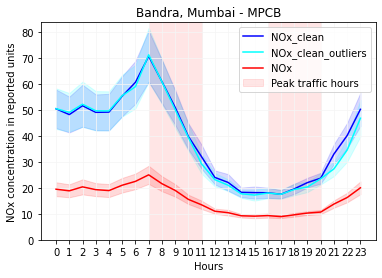

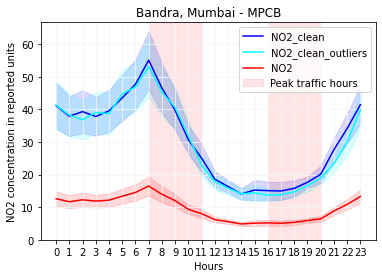

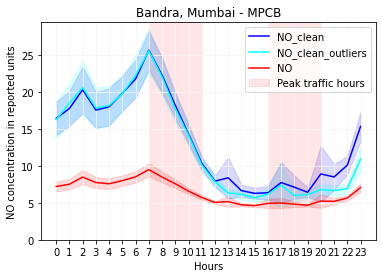

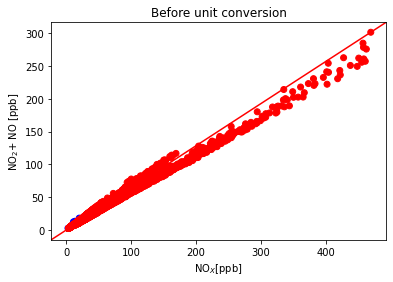

Pick an option, pick M for mixed:
1) C1
2) C2
3) M
4) 0
Your choice: M
You picked: M


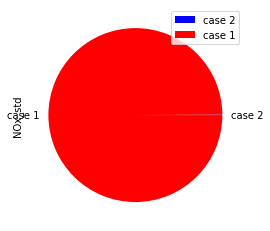

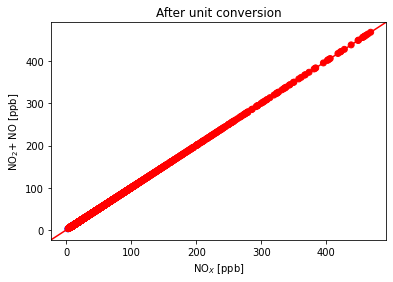

In [2]:

path = r"C:\Users\madhu\OneDrive - Indian Institute of Technology Bombay\Desktop\2020\df_csv\Bandra, Mumbai - MPCB_2020.csv"
true_df, station_name = get_formatted_df(path)

year = 2020
# true_df = true_df[true_df['dates'].dt.year == year]
true_df = true_df.loc[~true_df.index.duplicated(keep='first')]

df = true_df.copy(deep=True)

filename=station_name+"_"+str(year) 
start_html(filename)
print(station_name)

st_no = numbers_to_strings(station_name)
print(station_name)
only_plots = true_df.copy(deep=True)
local_df = true_df.copy(deep=True)

local_df['date'] =  pd.to_datetime(local_df['dates']).dt.date
local_df = local_df.sort_values(by=['dates'])
local_df = local_df[local_df['date'].notna()]
local_df['StationId'] = station_name
lst = ['PM25', 'PM10', 'NOx', 'NO2', 'NO', 'Ozone' ]
lst = ['NOx', 'NO2', 'NO' ]
for name in lst:
    if len(df[name].value_counts()) == 0:
        print("No available ", name, " data")
        continue
    else:

        try:
            local_df = group_plot(only_plots, local_df, name, name,station_name,filename, st_no) 
            print("successfully cleaned ", name, " ", station_name)

        except:
            print('error in ',name, " ", station_name)
            pass
        
local_df = correct_unit_inconsistency(local_df)
# local_df = correct_unit_inconsistency(local_df)


# local_df.to_csv(str("new_raj\\") + str(station_name) +'_'+ str(year)+ ".csv")
# print("saved successfully for", station_name)

